# Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


## Data Preprocessing

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
X = scaler.fit_transform(X)

## Training SOM


In [8]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [9]:
som.random_weights_init(X)
som.train_random(X,num_iteration=100)

## Visualizing SOM

In [10]:
from pylab import bone,pcolor,colorbar,plot,show

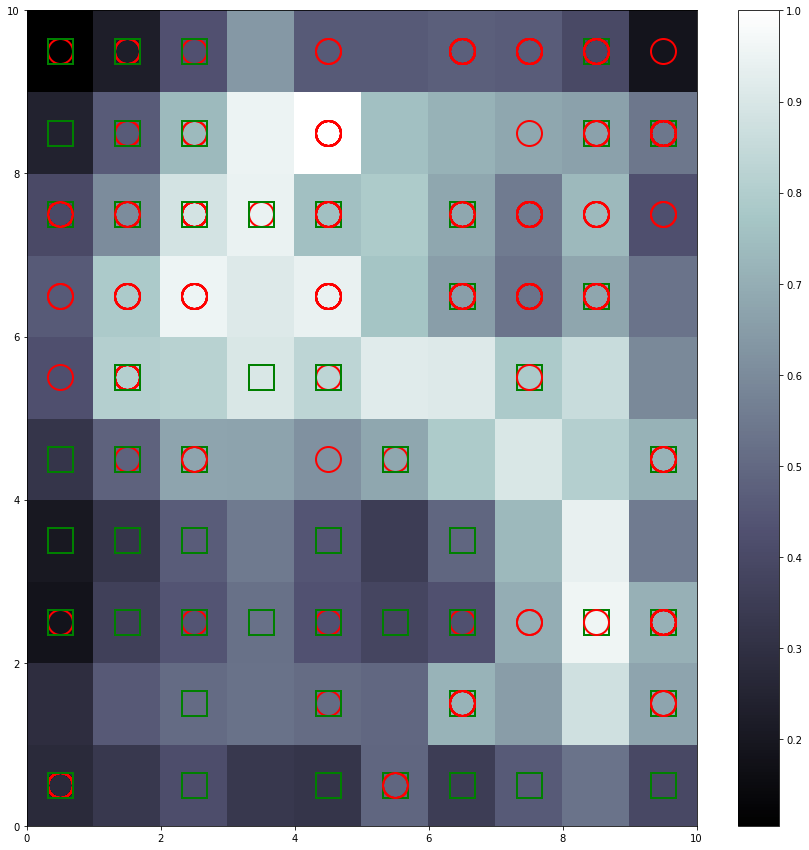

In [22]:
plt.figure(figsize=(15,15))
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
color=['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=color[y[i]],
         markerfacecolor='None',
         markersize=25,
         markeredgewidth=2)
show()

## Finding Frauds

In [23]:
mappings =som.win_map(X)
frauds = np.concatenate((mappings[(2,6)],mappings[(4,8)]),axis=0)
frauds = scaler.inverse_transform(frauds)
frauds

array([[1.5664793e+07, 0.0000000e+00, 1.7330000e+01, 9.5000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+01, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.1000000e+01],
       [1.5763579e+07, 0.0000000e+00, 1.6000000e+01, 1.6500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 2.0000000e+00],
       [1.5662189e+07, 0.0000000e+00, 2.8580000e+01, 3.7500000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.0000000e+01, 1.5500000e+02],
       [1.5793825e+07, 0.0000000e+00, 3.1920000e+01, 3.1250000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.0400000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00,